In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\pratham\Desktop\Machine-Learning-Models\LSTM\Time-Series-Forecasting-using-LSTM\monthly_milk_production.csv', index_col='Date', parse_dates=True)
df.index.freq='MS'

In [5]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

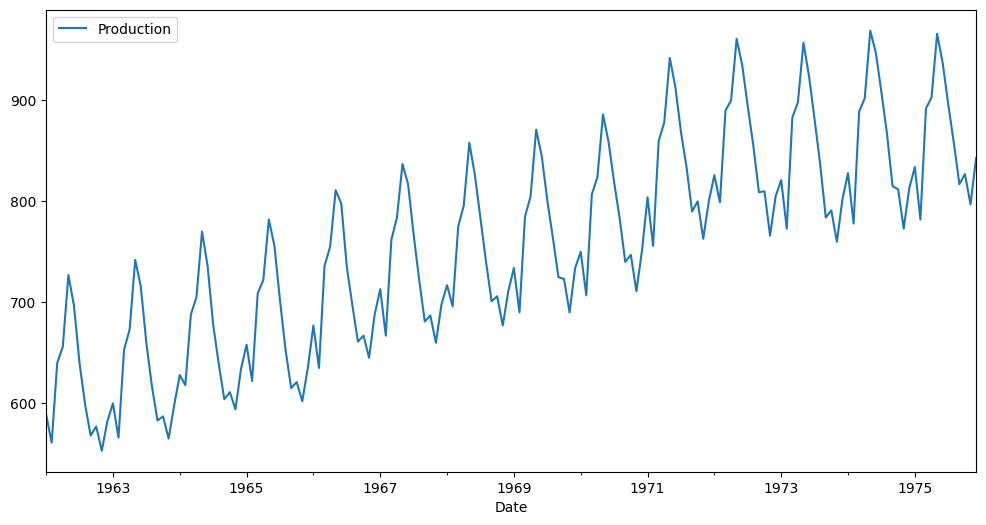

In [6]:
df.plot(figsize=(12,6))

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

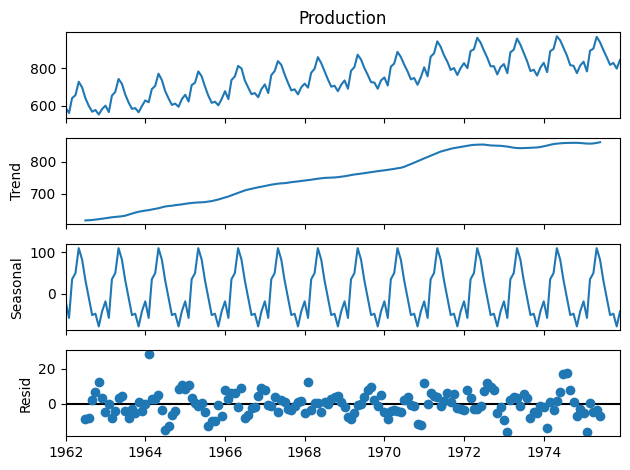

In [8]:
results=seasonal_decompose(df['Production'])
results.plot();

In [9]:
len(df)

168

In [10]:
train=df.iloc[:156]
test=df.iloc[156:]

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [12]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [13]:
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [14]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [15]:
from keras.preprocessing.sequence import TimeseriesGenerator 

In [18]:
pip install keras


  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/b0/b2/104733bb67fde86f3d10010f0b5c93cfa1d5bf552f904584cf9e5b3ba719/keras-3.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36cf93e30c1ce/rich-13.7.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/101.3 kB ? eta -:--:--
     ----------------------------------- --- 92.2/101.3 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 101.3/101.3 kB 1.9 MB/s eta 0:00:00
  Obtaining dependency information for ml-dtypes from https://files.pythonhosted.org/packages/a4/db/1784b87285588788170f87e987bfb4bda218d62a70a81ebb66c94e7f9b95/ml_dtypes-0.3.2-c

In [16]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [18]:
#define generator
n_input=3
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [21]:
X,y=generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
[[0.24759615]]


In [23]:
X.shape

(1, 3, 1)

In [25]:
# Now for 12 Months
n_input=12
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [31]:
#define model
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
#fit model
model.fit(generator,epochs=50)

Epoch 1/50

144/144 [==============================] - 5s 12ms/step - loss: 0.0505
Epoch 2/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0211
Epoch 3/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0166
Epoch 4/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0114
Epoch 5/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0088
Epoch 6/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0053
Epoch 7/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0074
Epoch 8/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0034
Epoch 9/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0045
Epoch 10/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0035
Epoch 11/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0032
Epoch 12/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0039
Epoch 13/50


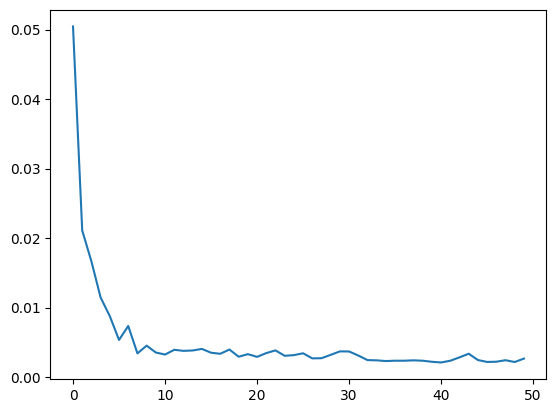

In [34]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [35]:
last_train_batch=scaled_train[-12:]

In [36]:
last_train_batch=last_train_batch.reshape((1,n_input,n_features))

In [37]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 430ms/step


array([[0.6035978]], dtype=float32)

In [38]:
scaled_test[0]

array([0.67548077])

In [39]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 32ms/step


In [40]:
test_predictions

[array([0.6035978], dtype=float32),
 array([0.587296], dtype=float32),
 array([0.77261925], dtype=float32),
 array([0.8434701], dtype=float32),
 array([0.9302294], dtype=float32),
 array([0.9102558], dtype=float32),
 array([0.8419384], dtype=float32),
 array([0.7377964], dtype=float32),
 array([0.624772], dtype=float32),
 array([0.5781867], dtype=float32),
 array([0.53119105], dtype=float32),
 array([0.563514], dtype=float32)]

In [41]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [42]:
true_predictions=scaler.inverse_transform(test_predictions)

In [44]:
test['Predictions']=true_predictions

C:\Users\pratham\AppData\Local\Temp\ipykernel_1532\2664784394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']=true_predictions


<Axes: xlabel='Date'>

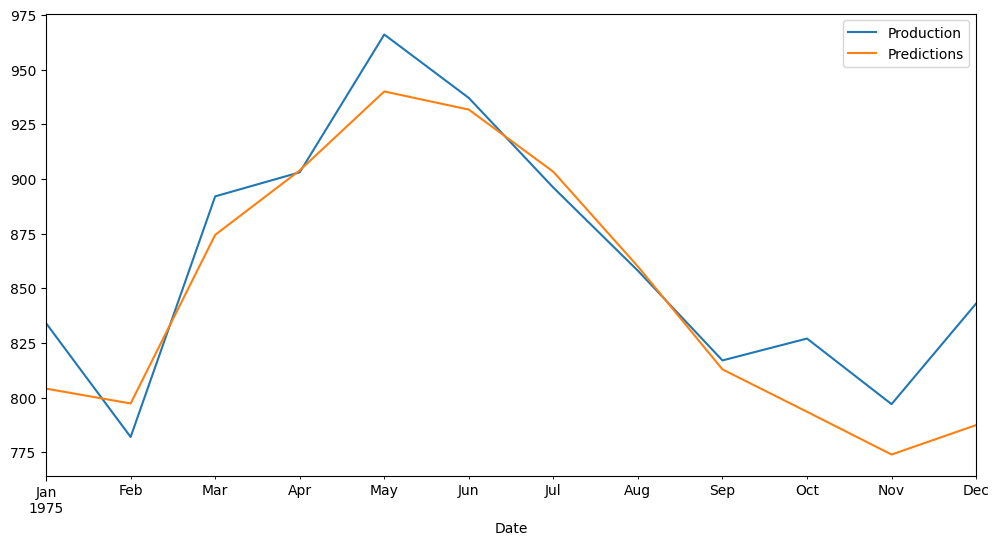

In [46]:
test.plot(figsize=(12,6))

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

24.078446791505055
